In [1]:
# Setting up the notebook
import sys
import os

# Import local libraries
sys.path.append('../exercises_complements')
from shared_functions import check_task_with_solution
from darcy_functions import launch_darcy_experiment_interactive

# Exercise 4 : Darcy law

## Context

This exercise helps you to familiarize with Darcy law, for 1D and steady state conditions.

A soil layer has the following properties :
- length $L$ : 40 $\text{m}$
- hydraulic conductivity $K$ :  $5 \cdot 10^{-5} \text{m}\text{s}^{-1}$

The water goes horizontally through the layer. Inflow and outflow specific discharges are equal at steady state. The discharge per unit width of the aquifer can be measured and it is found to be $q$ = $3 \cdot 10^{-6}\text{m}^2\text{s}^{-1}$.

An observation wells is installed at $x_0$ and measures the water table hight there: $h(x_0)$= 50m.


In [2]:


# Check the tasks for this exercise
check_task_with_solution("task04_1")
check_task_with_solution("task04_2")


## Task 1:
Based on given data, estimate the water table level at $x$ = 200m :


Output()

Button(description='Show Solution', disabled=True, style=ButtonStyle())

Output()


## Task 2:
Based on given data, estimate the water table level at $x$ = 400m :


Output()

Button(description='Show Solution', disabled=True, style=ButtonStyle())

Output()

## Interactive exploration

The following tool offers an interactive illustration of the situation previously studied. 

The default values of $K$ and $q$ are the ones fixed previously, which you used for the Tasks 1 and 2. 

You are encouraged to use the sliders in order to see how changes in $K$ and/or $q$ impact the water table profile $h(x)$.

In [3]:

# Check the tasks for this exercise
launch_darcy_experiment_interactive()

interactive(children=(FloatSlider(value=5e-05, description='K:', max=0.0001, min=1e-05, step=1e-05), FloatSlid…

Develppment


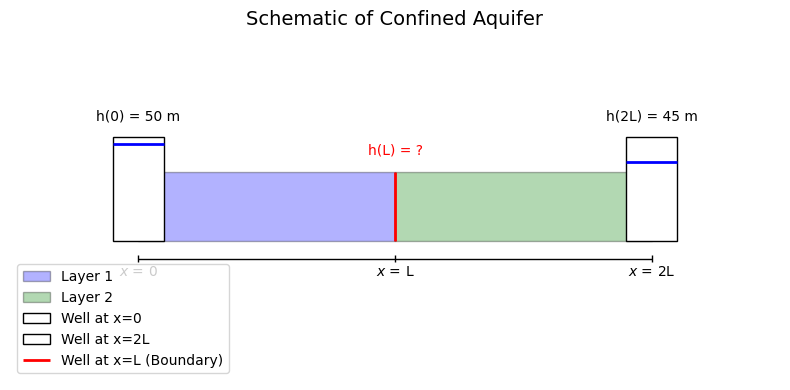

### Submit the value of $h$ at $x = L$

Output()

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, Markdown, clear_output

def interactive_confined_aquifer():
    """
    Interactive tool to visualize a confined aquifer with two layers of differing K values.
    Initially, only the schematic is shown, and the student is asked to input h(L).
    After submission, the correction is shown, and the h(x) plot is displayed below the schematic.
    """
    # Parameters
    L = 10  # Length of each layer (m)
    K1 = 5e-5  # Hydraulic conductivity of the first layer (m/s)
    K2 = 1e-5  # Hydraulic conductivity of the second layer (m/s)
    q = 3e-6  # Specific discharge (m^2/s)
    h0 = 50  # Hydraulic head at x = 0 (m)
    h2L = 45  # Hydraulic head at x = 2L (m)

    # Calculate h(x) for the two layers
    x1 = np.linspace(0, L, 100)  # x values for the first layer
    x2 = np.linspace(L, 2 * L, 100)  # x values for the second layer
    h1 = h0 - (q / K1) * x1  # h(x) in the first layer
    h2 = h1[-1] - (q / K2) * (x2 - L)  # h(x) in the second layer

    # Function to draw the schematic# Function to draw the schematic
    def draw_schematic():
        fig, ax = plt.subplots(figsize=(8, 4))

        # Draw the two layers
        ax.add_patch(plt.Rectangle((0, 4), L, 2, edgecolor="black", facecolor="blue", alpha=0.3, label="Layer 1"))
        ax.add_patch(plt.Rectangle((L, 4), L, 2, edgecolor="black", facecolor="green", alpha=0.3, label="Layer 2"))

        # Draw the wells as piezometers (tubes)
        # Well at x=0
        ax.add_patch(plt.Rectangle((-1, 4), 2, 3, edgecolor="black", facecolor="white", label="Well at x=0"))
        ax.hlines(6.8, -1, 1, colors="blue", linewidth=2)  # Water table level inside the well

        # Well at x=2L
        ax.add_patch(plt.Rectangle((2 * L - 1, 4), 2, 3, edgecolor="black", facecolor="white", label="Well at x=2L"))
        ax.hlines(6.3, 2 * L - 1, 2 * L + 1, colors="blue", linewidth=2)  # Water table level inside the well

        # Well at x=L (Boundary)
        ax.vlines(L, 4, 6, colors="red", linewidth=2, label="Well at x=L (Boundary)")

        # Add labels for the wells
        ax.text(0, 7.5, f"h(0) = {h0} m", fontsize=10, ha="center")
        ax.text(L, 6.5, "h(L) = ?", fontsize=10, ha="center", color="red")
        ax.text(2 * L, 7.5, f"h(2L) = {h2L} m", fontsize=10, ha="center")

        # Add the x-axis at the bottom
        ax.hlines(3.5, 0, 2 * L, colors="black", linewidth=1)  # Horizontal line for the x-axis
        ax.text(0, 3, "$x$ = 0", fontsize=10, ha="center")  # Label for x=0
        ax.text(L, 3, "$x$ = L", fontsize=10, ha="center")  # Label for x=L
        ax.text(2 * L, 3, "$x$ = 2L", fontsize=10, ha="center")  # Label for x=2L

        # Add ticks on the x-axis
        ax.vlines(0, 3.4, 3.6, colors="black", linewidth=1)  # Tick at x=0
        ax.vlines(L, 3.4, 3.6, colors="black", linewidth=1)  # Tick at x=L
        ax.vlines(2 * L, 3.4, 3.6, colors="black", linewidth=1)  # Tick at x=2L

        ax.set_xlim(-5, 2 * L + 5)
        ax.set_ylim(0, 10)
        ax.set_title("Schematic of Confined Aquifer", fontsize=14)
        ax.set_xlabel("$x$ [m]", fontsize=12)
        ax.axis("off")
        ax.legend(fontsize=10)

        plt.tight_layout()
        plt.show()

    # Function to draw the h(x) plot
    def draw_hx_plot():
        fig, ax = plt.subplots(figsize=(4, 4))

        # Plot h(x)
        ax.plot(x1, h1, label=f"Layer 1 (K = {K1} m/s)", color="blue")
        ax.plot(x2, h2, label=f"Layer 2 (K = {K2} m/s)", color="green")
        ax.axvline(L, color="red", linestyle="--", label="x = L (Boundary)")

        ax.set_title("Hydraulic Head $h(x)$ vs Horizontal Location $x$", fontsize=14)
        ax.set_xlabel("$x$ [m]", fontsize=12)
        ax.set_ylabel("$h(x)$ [m]", fontsize=12)
        ax.legend(fontsize=10)
        ax.grid(True)

        plt.tight_layout()
        plt.show()

    # Display the schematic
    draw_schematic()

    # --- Interactive Input for h(L) ---
    display(Markdown("### Submit the value of $h$ at $x = L$"))
    h_input = widgets.FloatText(
        description="h(L):",
        style={'description_width': 'initial'}
    )
    submit_button = widgets.Button(description="Submit")
    output = widgets.Output()

    def on_submit(b):
        with output:
            clear_output(wait=True)
            h_L = h_input.value
            correct_h_L = h1[-1]  # Theoretical value of h(L)
            if np.isclose(h_L, correct_h_L, atol=0.1):
                display(Markdown(f"**Correct!** The value of $h(L)$ is approximately {correct_h_L:.2f} m."))
            else:
                display(Markdown(f"**Incorrect.** The correct value of $h(L)$ is approximately {correct_h_L:.2f} m."))

            # Draw the h(x) plot below the schematic
            display(Markdown("### Hydraulic Head $h(x)$ Plot"))
            draw_hx_plot()

    submit_button.on_click(on_submit)
    display(widgets.HBox([h_input, submit_button]), output)

# Call the function
interactive_confined_aquifer()

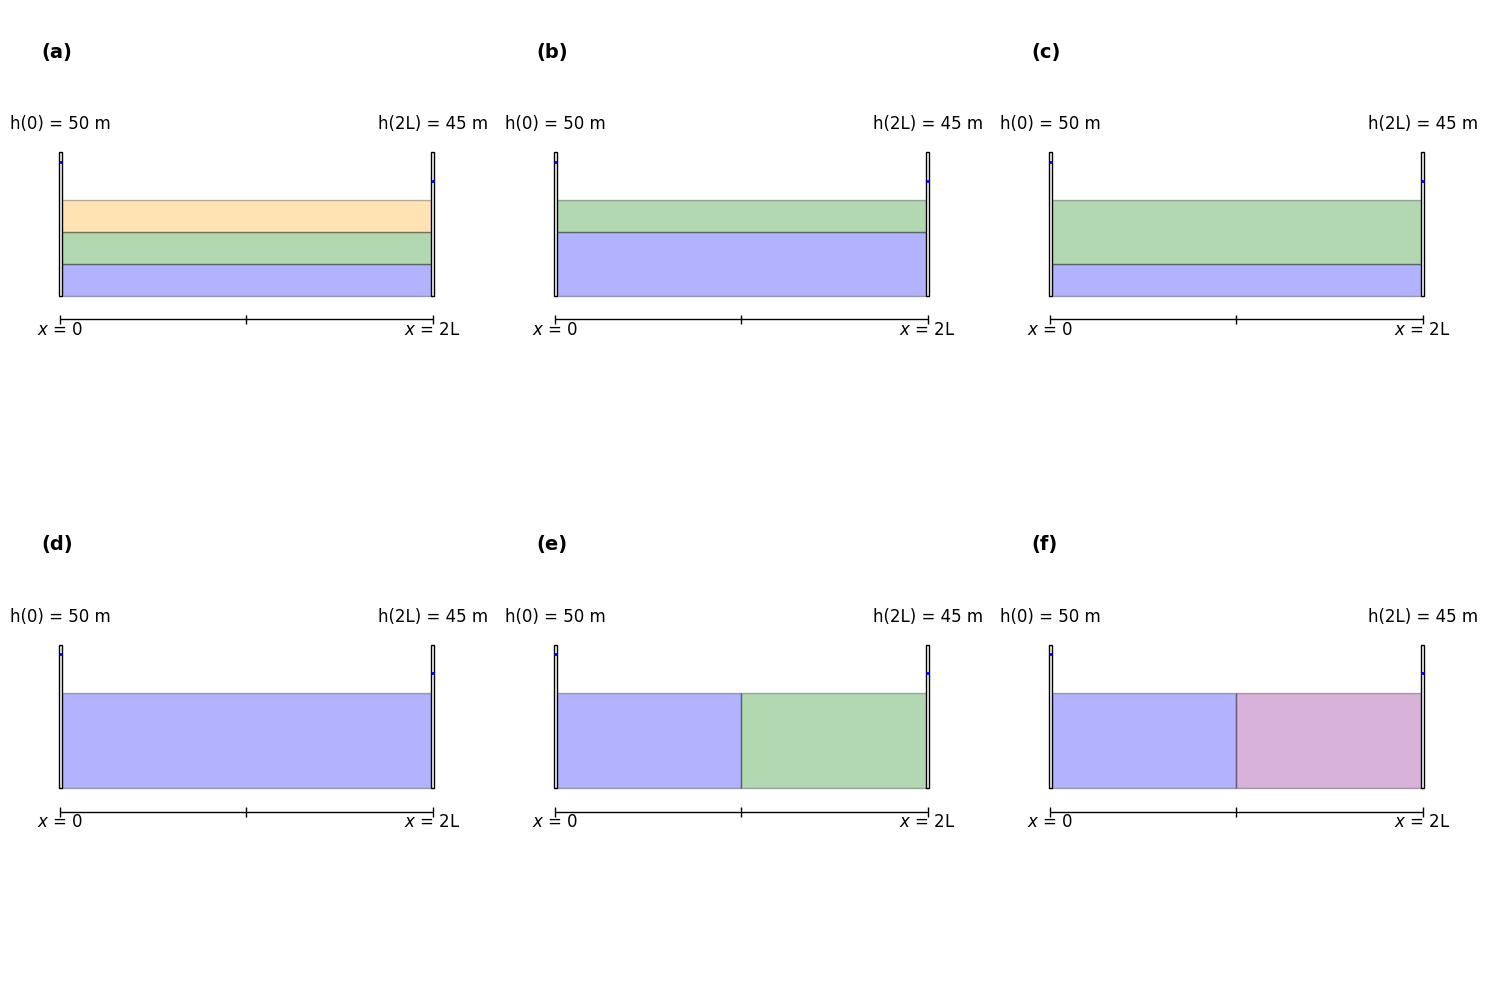

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_schematic(ax, label, configuration):
    """
    Draws the schematic of the confined aquifer on the given axis based on the configuration.
    """
    L = 100  # Total length of the aquifer (m)
    h0 = 50  # Hydraulic head at x = 0 (m)
    h2L = 45  # Hydraulic head at x = 2L (m)
    type_formula = "vertical"  # Default type_formula

    # Draw the layers based on the configuration
    if configuration == 1:  # Single layer of K1
        type_formula = "vertical"
        ax.add_patch(patches.Rectangle((0, 4), 2*L, 0.67, edgecolor="black", facecolor="blue", alpha=0.3, label="Layer K1"))
        ax.add_patch(patches.Rectangle((0, 4.67), 2*L, 0.67, edgecolor="black", facecolor="green", alpha=0.3, label="Layer K2"))
        ax.add_patch(patches.Rectangle((0, 5.33), 2*L, 0.67, edgecolor="black", facecolor="orange", alpha=0.3, label="Layer K3"))

    elif configuration == 2:  # Vertically 2 layers: 2/3 K1, 1/3 K2
        type_formula = "vertical"
        ax.add_patch(patches.Rectangle((0, 4), 2*L, 1.33, edgecolor="black", facecolor="blue", alpha=0.3, label="Layer K1"))
        ax.add_patch(patches.Rectangle((0, 5.33), 2*L, 0.67, edgecolor="black", facecolor="green", alpha=0.3, label="Layer K2"))

    elif configuration == 3:  # Vertically 2 layers: 1/3 K1, 2/3 K2
        type_formula = "vertical"
        ax.add_patch(patches.Rectangle((0, 4), 2*L, 0.67, edgecolor="black", facecolor="blue", alpha=0.3, label="Layer K1"))
        ax.add_patch(patches.Rectangle((0, 4.67), 2*L, 1.33, edgecolor="black", facecolor="green", alpha=0.3, label="Layer K2"))

    elif configuration == 4:  # Vertically 3 layers: 1/3 K1, 1/3 K2, 1/3 K3
        type_formula = "horizontal"
        ax.add_patch(patches.Rectangle((0, 4), 2*L, 2, edgecolor="black", facecolor="blue", alpha=0.3, label="Layer K1"))
        
    elif configuration == 5:  # Horizontally 1/2 K1 and 1/2 K2
        type_formula = "horizontal"
        ax.add_patch(patches.Rectangle((0, 4), 2*L / 2, 2, edgecolor="black", facecolor="blue", alpha=0.3, label="Layer K1"))
        ax.add_patch(patches.Rectangle((2*L / 2, 4), 2*L / 2, 2, edgecolor="black", facecolor="green", alpha=0.3, label="Layer K2"))

    elif configuration == 6:  # Horizontally 1/2 K1 and 1/2 K4
        type_formula = "horizontal"
        ax.add_patch(patches.Rectangle((0, 4), 2*L / 2, 2, edgecolor="black", facecolor="blue", alpha=0.3, label="Layer K1"))
        ax.add_patch(patches.Rectangle((2*L / 2, 4), 2*L / 2, 2, edgecolor="black", facecolor="purple", alpha=0.3, label="Layer K4"))

    # Draw the wells as piezometers (tubes)
    # Well at x=0
    ax.add_patch(patches.Rectangle((-1, 4), 2, 3, edgecolor="black", facecolor="white", label="Well at x=0"))
    ax.hlines(6.8, -1, 1, colors="blue", linewidth=2)  # Water table level inside the well

    # Well at x=2L
    ax.add_patch(patches.Rectangle((2 * L - 1, 4), 2, 3, edgecolor="black", facecolor="white", label="Well at x=2L"))
    ax.hlines(6.4, 2 * L - 1, 2 * L + 1, colors="blue", linewidth=2)  # Water table level inside the well

    # Add labels for the wells
    ax.text(0, 7.5, f"h(0) = {h0} m", fontsize=12, ha="center")
    ax.text(2 * L, 7.5, f"h(2L) = {h2L} m", fontsize=12, ha="center")

    # Add the x-axis at the bottom
    ax.hlines(3.5, 0, 2 * L, colors="black", linewidth=1)  # Horizontal line for the x-axis
    ax.text(0, 3.2, "$x$ = 0", fontsize=12, ha="center")  # Label for x=0
    ax.text(2 * L, 3.2, "$x$ = 2L", fontsize=12, ha="center")  # Label for x=2L

    # Add ticks on the x-axis
    ax.vlines(0, 3.4, 3.6, colors="black", linewidth=1)  # Tick at x=0
    ax.vlines(L, 3.4, 3.6, colors="black", linewidth=1)  # Tick at x=L
    ax.vlines(2 * L, 3.4, 3.6, colors="black", linewidth=1)  # Tick at x=2L

    # Add subplot label
    ax.text(-10, 9, f"({label})", fontsize=14, fontweight="bold", ha="left")

    ax.set_xlim(-5, 2 * L + 5)
    ax.set_ylim(0, 10)
    ax.axis("off")


# Create the figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns


# Labels for the subplots
labels = ["a", "b", "c", "d", "e", "f"]

# Configurations for each subplot
configurations = [1, 2, 3, 4, 5, 6]

# Draw the schematic in each subplot
for ax, label, config in zip(axes.flat, labels, configurations):
    draw_schematic(ax, label, config)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_h_function(type_layers, K1, K2, K3=None, L, h0):
    """
    Plots the hydraulic head h(x) based on the type of layering (vertical or horizontal).

    Parameters:
        type_layers (str): "vertical" or "horizontal".
        K1 (float): Hydraulic conductivity of the first layer.
        K2 (float): Hydraulic conductivity of the second layer.
        K3 (float, optional): Hydraulic conductivity of the third layer (for vertical layers).
        L (float): Length of the aquifer (m).
        h0 (float): Hydraulic head at x=0 (m).
    """
    q=3e-6
    x = np.linspace(0, 2 * L, 500)  # x values for the entire domain

    if type_layers == "vertical":
        # For vertical layers: h(x) = h0 - (1 / (K1 + K2 + K3)) * (q / 2L) * x
        if K3 is None:
            raise ValueError("K3 must be provided for vertical layers.")
        K_eff = 1 / (1 / K1 + 1 / K2 + 1 / K3)  # Effective hydraulic conductivity
        h = h0 - (q / K_eff) * (x / (2 * L))
        plt.plot(x, h, label="Vertical Layers")

    elif type_layers == "horizontal":
        # For horizontal layers:
        # h(x < L) = h(0) - (q / K1) * (x / L)
        # h(x > L) = h(L) - (q / K2) * ((x - L) / L)
        x1 = x[x <= L]
        x2 = x[x > L]
        h1 = h0 - (q / K1) * (x1 / L)
        h_L = h1[-1]  # Hydraulic head at x = L
        h2 = h_L - (q / K2) * ((x2 - L) / L)
        plt.plot(x1, h1, label="Horizontal Layer 1")
        plt.plot(x2, h2, label="Horizontal Layer 2")

    else:
        raise ValueError("Invalid type_layers. Use 'vertical' or 'horizontal'.")

    # Plot settings
    plt.title("Hydraulic Head h(x)")
    plt.xlabel("x [m]")
    plt.ylabel("h(x) [m]")
    plt.legend()
    plt.grid(True)
    plt.show()

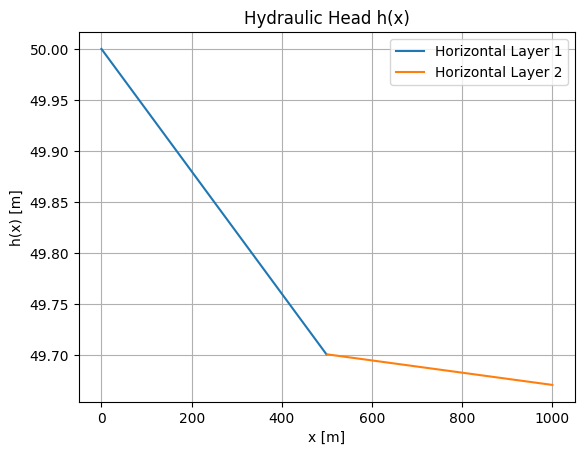

In [20]:
plot_h_function("horizontal", 1e-5, 1e-4, 3, L=500, h0=50)